## Fake News Detection


#### Author: Raghul V

### Installing and Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
fake = pd.read_csv(r"C:\Users\Raghul\Downloads/fake.csv")
true = pd.read_csv(r"C:\Users\Raghul\Downloads/True.csv")

In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

In [6]:
# Adding flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [7]:
# Concatenation or linking of dataframes 
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
# Shuffling the datasets
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


In [9]:
# Processing the data
data.head()

,title,text,subject,date,target
0,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...,The video begins with a clearly agitated pro-i...,politics,"Feb 27, 2017",fake
1,"In demanding Hariri's return, Lebanese find ra...",BEIRUT (Reuters) - A country long divided by s...,worldnews,"November 12, 2017",true
2,Trump and Christie join forces to attack Obama...,WASHINGTON (Reuters) - Republicans Donald Trum...,politicsNews,"July 11, 2016",true
3,North Korea official says North may consider h...,SEOUL (Reuters) - North Korean Foreign Ministe...,worldnews,"September 22, 2017",true
4,Burundi will raise funds from citizens to pay ...,NAIROBI (Reuters) - Burundi plans to raise mon...,worldnews,"December 11, 2017",true


In [10]:
# Removing the date (Unwanted data for analysis or detection)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...,The video begins with a clearly agitated pro-i...,politics,fake
1,"In demanding Hariri's return, Lebanese find ra...",BEIRUT (Reuters) - A country long divided by s...,worldnews,true
2,Trump and Christie join forces to attack Obama...,WASHINGTON (Reuters) - Republicans Donald Trum...,politicsNews,true
3,North Korea official says North may consider h...,SEOUL (Reuters) - North Korean Foreign Ministe...,worldnews,true
4,Burundi will raise funds from citizens to pay ...,NAIROBI (Reuters) - Burundi plans to raise mon...,worldnews,true


In [11]:
# Removing the heading title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,The video begins with a clearly agitated pro-i...,politics,fake
1,BEIRUT (Reuters) - A country long divided by s...,worldnews,true
2,WASHINGTON (Reuters) - Republicans Donald Trum...,politicsNews,true
3,SEOUL (Reuters) - North Korean Foreign Ministe...,worldnews,true
4,NAIROBI (Reuters) - Burundi plans to raise mon...,worldnews,true


In [12]:
# Converting the text to lowercase elements

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,the video begins with a clearly agitated pro-i...,politics,fake
1,beirut (reuters) - a country long divided by s...,worldnews,true
2,washington (reuters) - republicans donald trum...,politicsNews,true
3,seoul (reuters) - north korean foreign ministe...,worldnews,true
4,nairobi (reuters) - burundi plans to raise mon...,worldnews,true


In [13]:
# Removing all the punctuation from the dataset

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [14]:
# Checking the data
data.head()

,text,subject,target
0,the video begins with a clearly agitated proil...,politics,fake
1,beirut reuters a country long divided by sect...,worldnews,true
2,washington reuters republicans donald trump a...,politicsNews,true
3,seoul reuters north korean foreign minister r...,worldnews,true
4,nairobi reuters burundi plans to raise money ...,worldnews,true


In [15]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raghul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data.head()

,text,subject,target
0,video begins clearly agitated proillegal alien...,politics,fake
1,beirut reuters country long divided sectarian ...,worldnews,true
2,washington reuters republicans donald trump ch...,politicsNews,true
3,seoul reuters north korean foreign minister ri...,worldnews,true
4,nairobi reuters burundi plans raise money elec...,worldnews,true


### Exploratory Data Analysis

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


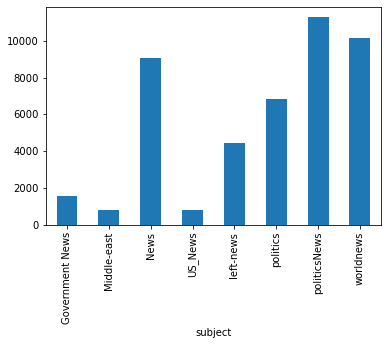

In [17]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


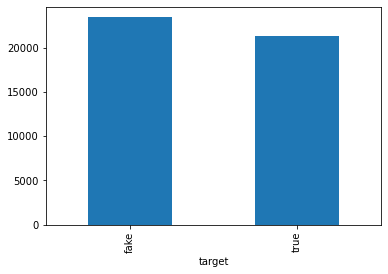

In [18]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

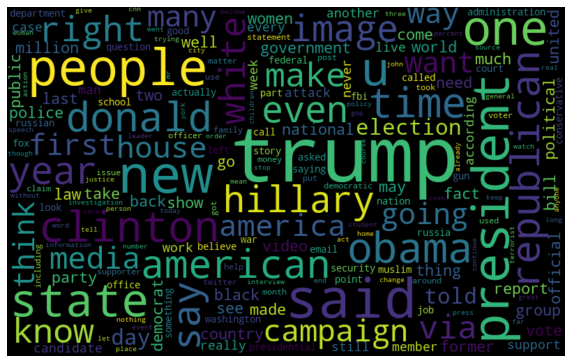

In [19]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

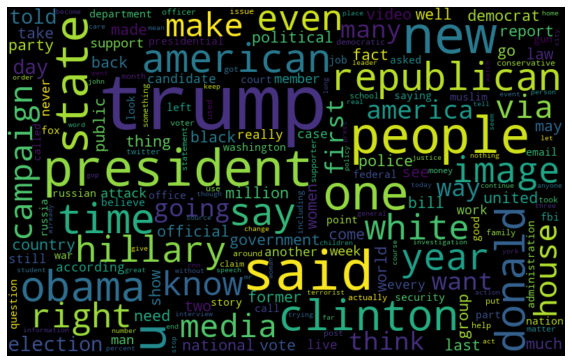

In [20]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

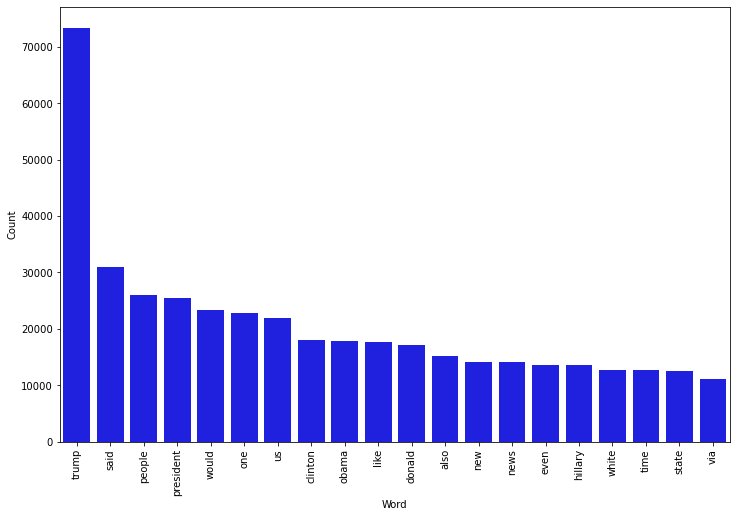

In [22]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

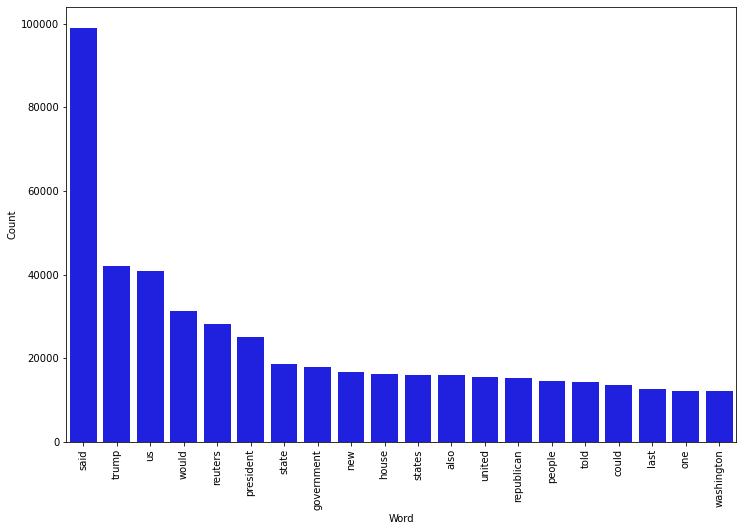

In [23]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

### Model Creation

In [24]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Data Preperation

In [25]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### Logistic Regression

In [26]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.9%


Confusion matrix, without normalization


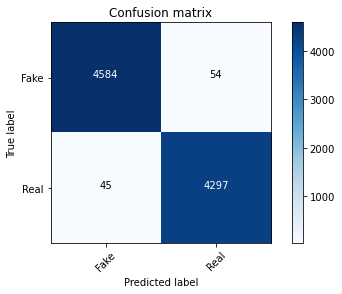

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.64%


Confusion matrix, without normalization


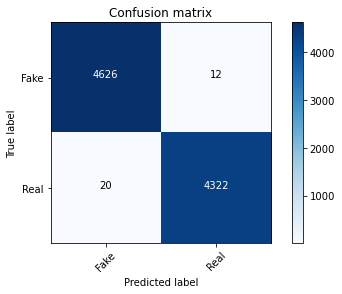

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.75%


Confusion matrix, without normalization


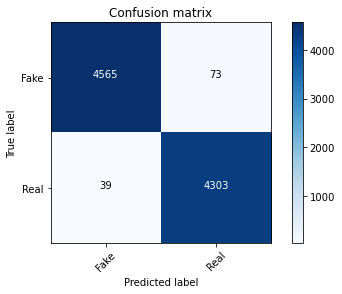

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Conclusion

From the above processing we have predicted the values as follows,
 - Logistic Regression      - 98.90%
 - Decision Tree Classifier - 99.64%
 - Random Forest Classifier - 98.75%